# Life Expectancy and GDP

## Project Objective
For this project, I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

Here are the questions I will seek to answer:
+ What is the distribution and spread of GDP?
+ What is the distribution of and spread of life expectancy?
+ Has life expectancy increased over time?
+ Has GDP increased over time?
+ Is there a correlation between GDP and life expectancy of a country?


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy.builtins import Q 

#set the default color palette of seaborn
sns.set_palette('colorblind')
#store an array-like of in-palette colors for manual use.
palette6=sns.color_palette('colorblind')

### Step 1 - Exploratory Data Analysis
- Load the data from all_data.csv into a pandas data frame for inspection and manipulation.
- Preview the data.
- Inspect the data types.
- Check for blatantly null values.

In [2]:
all_data = pd.read_csv("all_data.csv")
#preview the data
print(all_data.head())
#examine the data types and information for each column
print(all_data.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


Upon initial inspection, the data types make sense given the information present in the data-set. There also does not seem to be any missing data points. To be certain, I'll examine the unique values of each column.

In [3]:
countries = all_data['Country'].unique()
print(f"Countries: {countries}\n")
print(f"Years: {all_data['Year'].unique()}\n")
print(f"L.E. at birth: {all_data['Life expectancy at birth (years)'].unique()}\n")
print(f"GDP: {all_data['GDP'].unique()}\n")

Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]

L.E. at birth: [77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]

GDP: [7.78609322e+10 7.09799240e+10 6.97368114e+10 7.56434598e+10
 9.92103929e+10 1.22965000e+11 1.54788000e+11 1.73606000e+11
 1.79638000e+11 1.72389000e+11 2.18538000e+11 2.52252000e+11
 2.67122000e+11 2.78384000e+11 2.60990000e+11 2.42518000e+11
 1.21135000e+12 1.33940000e+12 1.47055000e+12 1.66029000e+12
 1.95535000e+12 2.28597000e+12 2.75213000e+12 3.55218000e+12
 4.59821000e+12 5.10995000e+12 6.10062000e+12 7.57255000e+12
 8.56055000e+12 9.60722

There does not seem to be any missing data points.
It seems the data set contains information on 6 countries across 16 years.

### Step 2 - Summary Statistics
- Here I will exmaine the center and spread for each of...
    * GDP
    * Life Expectancy at Birth  

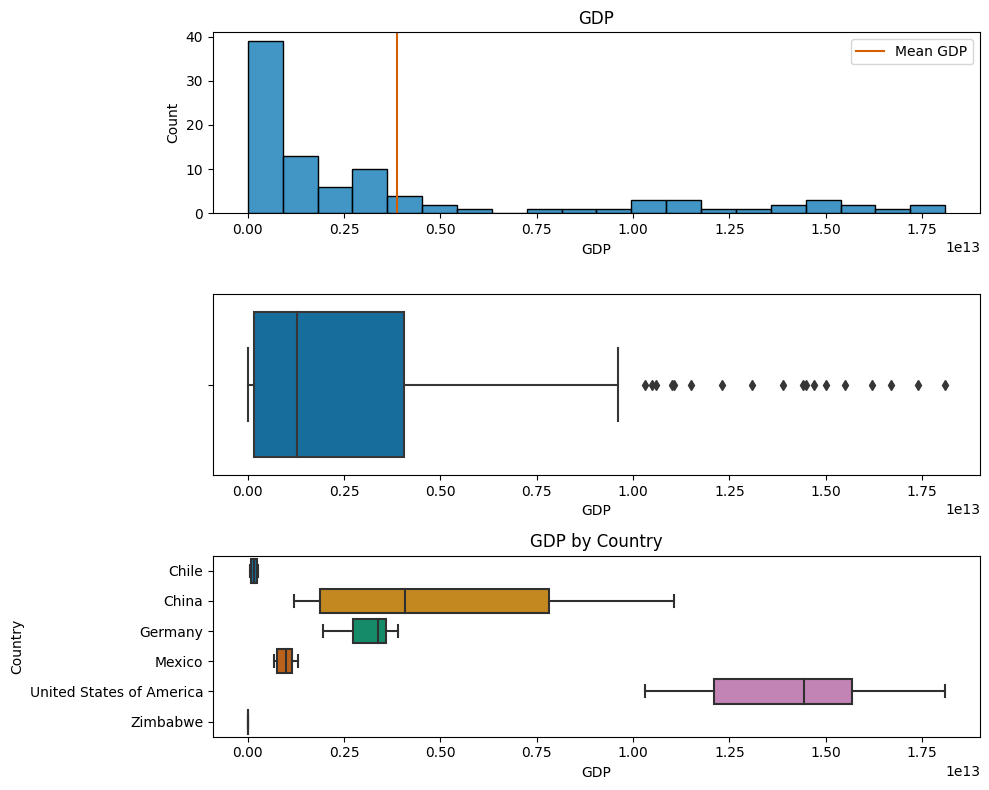

Statistics for GDP:
count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64


<Figure size 640x480 with 0 Axes>

In [26]:
#Create a 3x1 sub-plot to compare some quick visualizations of the data's center and spread.
fig = plt.figure(figsize=(10,8))

ax1 = plt.subplot(3,1,1)
#The first plot is a histogram of GDP to examine the shape of the data. 
ax1.set_title("GDP")
sns.histplot(data=all_data, x='GDP', bins=20)
plt.axvline(x=np.mean(all_data['GDP']),color=palette6[3],label="Mean GDP")
plt.legend()

ax2 = plt.subplot(3,1,2)
#The second plot is a box plot of GDP to see the quartiles, as well as outliers.
sns.boxplot(data=all_data, x='GDP')

ax3 = plt.subplot(3,1,3)
#The third plot is side by side box plots of GDP by country to better understand how the GDPs are grouped, and why outliers are present.
plt.title("GDP by Country")
sns.boxplot(data=all_data,x='GDP', y='Country')
fig.tight_layout()
plt.show()
plt.clf()

#Print numerical statistics to provide deeper insight to the plots.
print("Statistics for GDP:")
print(all_data['GDP'].describe())

Note: The data on GDP is grouped on the low-end, and is right-skewed with many high outliers. The US is almost entirely responsible for the high end outliers.

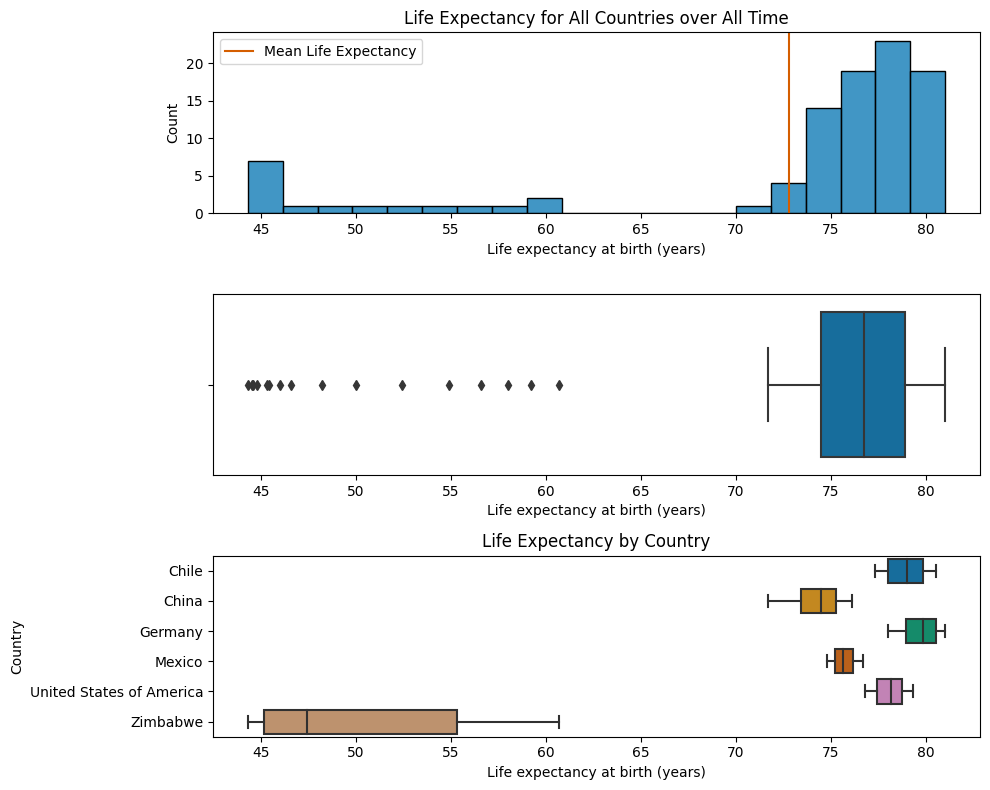

Statistics for Life Expectancy:
count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64


<Figure size 640x480 with 0 Axes>

In [25]:
#Create a 3x1 sub-plot to compare some quick visualizations of the data's center and spread.
fig = plt.figure(figsize=(10,8))

ax1 = plt.subplot(3,1,1)
#The first plot is a histogram of life expectancy to examine the shape of the data. 
ax1.set_title("Life Expectancy")
sns.histplot(data=all_data, x='Life expectancy at birth (years)', bins=20)
plt.axvline(x=np.mean(all_data['Life expectancy at birth (years)']),color=palette6[3],label="Mean Life Expectancy")
plt.legend()

ax2 = plt.subplot(3,1,2)
#The second plot is a box plot of life expectancy to see the quartiles, as well as outliers.
sns.boxplot(data=all_data, x='Life expectancy at birth (years)')

ax3 = plt.subplot(3,1,3)
#The third plot is side by side box plots of life expectancy by country to better understand how the life expectancies are grouped, and why outliers are present.
plt.title("Life Expectancy by Country")
sns.boxplot(data=all_data,x='Life expectancy at birth (years)', y='Country')
fig.tight_layout()
plt.show()
plt.clf()

#Print numerical statistics to provide deeper insight to the plots.
print("Statistics for Life Expectancy:")
print(all_data['Life expectancy at birth (years)'].describe())

Note: The data on life expectancy is grouped on the high end, and is left-skewed with many low outliers. Zimbabwe is single-handedly responsible for the low outliers.

### Step 3 - Questions

#### How has GDP changed over time?

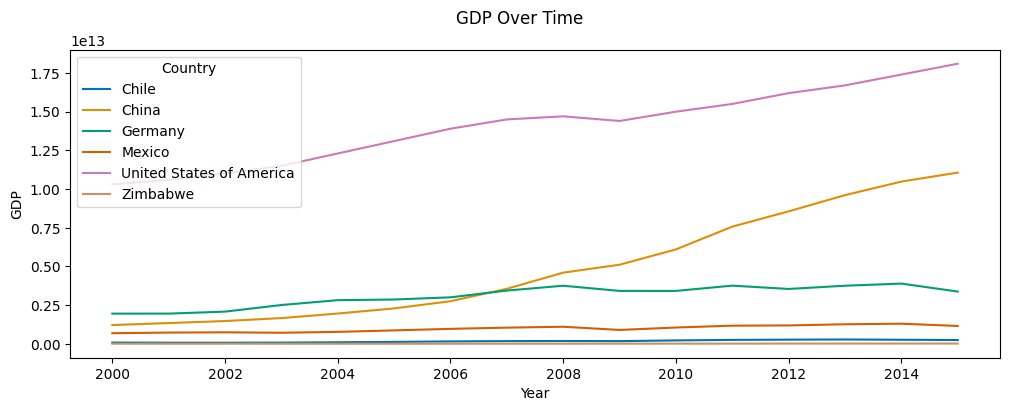

<Figure size 640x480 with 0 Axes>

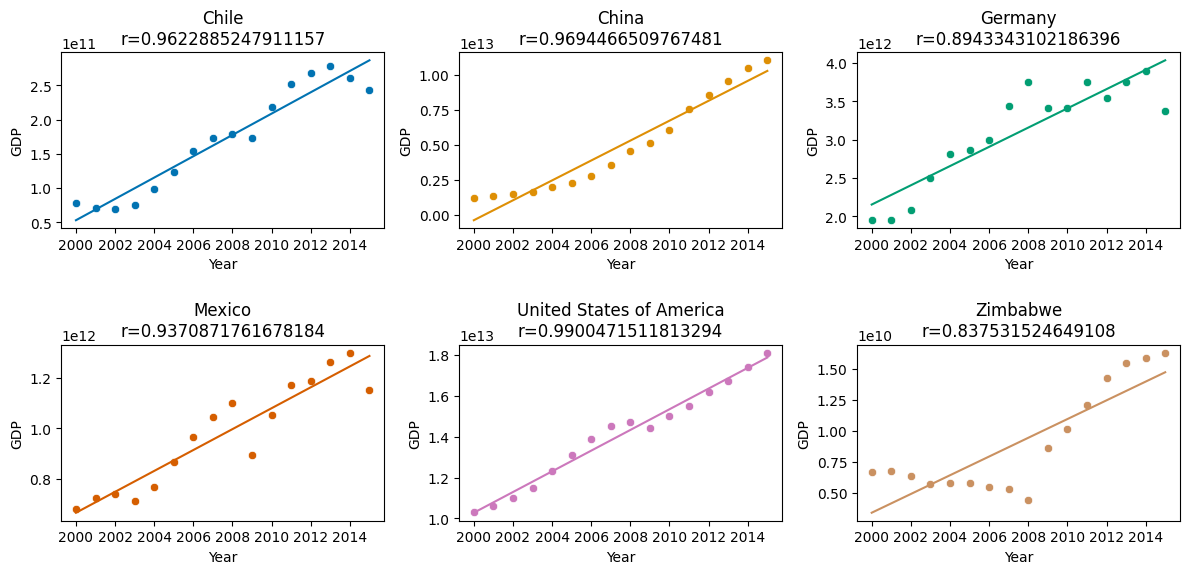

In [14]:
#Create one graph comparing the GDP over time for each country.
fig = plt.figure(figsize=(12,4))
fig.suptitle("GDP Over Time")
sns.lineplot(data=all_data, x='Year', y='GDP', hue='Country')
plt.show()
plt.clf()
fig = plt.figure(figsize=(12,6))

# Create a separate graph for each country to better understand the changes over time at scale for each.
# Loop through each country
# Create a scatter plot of GDP over time.
# Calculate a linear regression model and use it to fit expected results.
# Superimpose the line of best fit.
# Calculate the correlation coefficient for the model.
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks(ticks = [year for year in range(2000,2016,2)])
    country = countries[i]
    country_data=all_data[all_data.Country == country]
    plt.title(country)
    sns.scatterplot(data=country_data,x='Year', y='GDP', color=palette6[i])
    model = sm.OLS.from_formula('GDP ~ Year', country_data)
    results = model.fit()
    fitted = results.predict(country_data['Year'])
    plt.plot(country_data.Year, fitted, color=palette6[i])
    cor, pval = stats.pearsonr(country_data['Year'], country_data['GDP'])
    plt.title(f"{country}\nr={cor}")

fig.tight_layout()
plt.show()

Some observations to make about the GDP of each country over time:
- All of these country's GDPs have trended upward over time.
- The US shows a near-perfect linear relationships, with a corellation coefiicient of 0.99.
- Mexico and Germany appear to have the most year-to-year variability.
- Zimbabwe was the only country to show consistent decline in GDP, up until the year 2009. Since 2009, their GDP has consistently risen.
    - A quick web search indicates that in 2009, __["the government abandoned printing Zimbabwean dollars entirely" and has since "used a combination of foreign currencies, mostly US dollars." ](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjD6tis_6yAAxVHBzQIHfWQDmIQFnoECA4QAw&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FHyperinflation_in_Zimbabwe&usg=AOvVaw2FD06UP-l9TPvUJfgn62zf&opi=89978449)__ 

#### How has Life Expectancy changed over time?

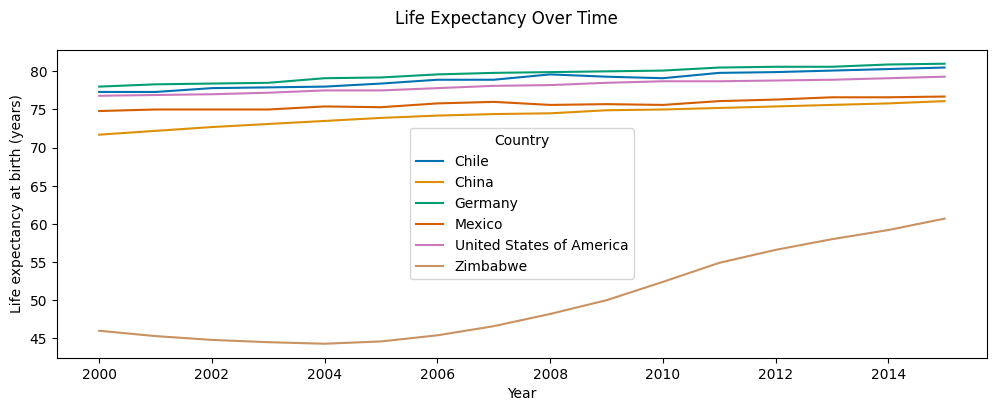

<Figure size 640x480 with 0 Axes>

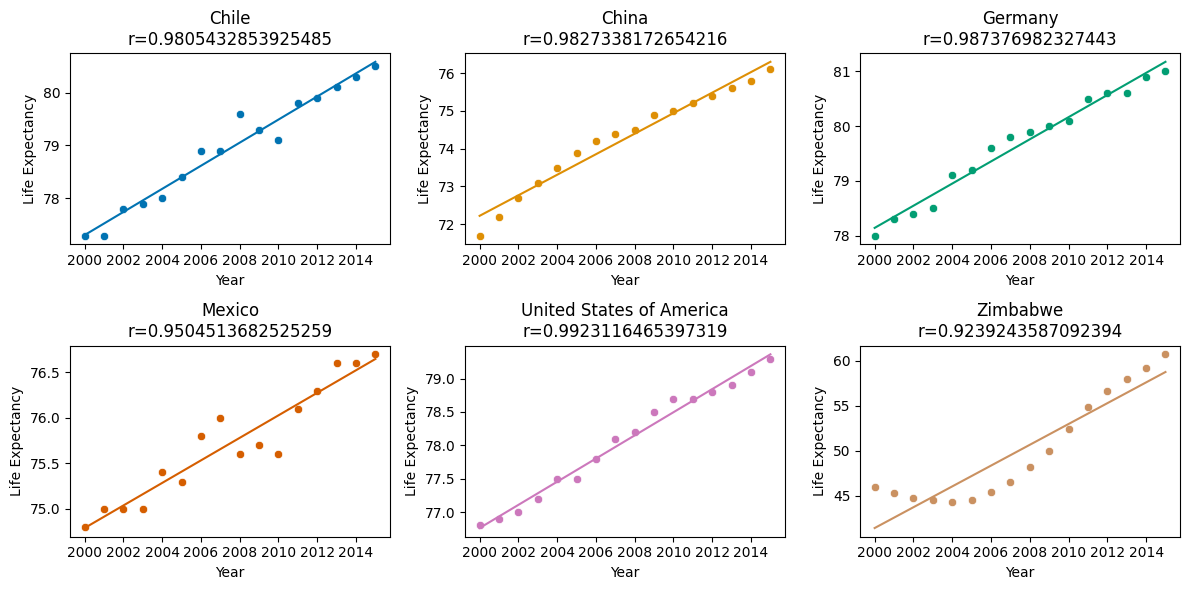

In [7]:
#Create one graph comparing the life expectancy over time for each country.
fig = plt.figure(figsize=(12,4))
fig.suptitle("Life Expectancy Over Time")
sns.lineplot(data=all_data, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.show()
plt.clf()
fig = plt.figure(figsize=(12,6))

# Create a separate graph for each country to better understand the changes over time at scale for each.
# Loop through each country
# Create a scatter plot of life expectancy over time.
# Calculate a linear regression model and use it to fit expected results.
# Superimpose the line of best fit.
# Calculate the correlation coefficient for the model.
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks(ticks = [year for year in range(2000,2016,2)])
    country = countries[i]
    country_data=all_data[all_data.Country == country]
    sns.scatterplot(data=country_data,x='Year', y='Life expectancy at birth (years)', color=palette6[i])
    # The column name 'Life expectancy at birth (years)' does not follow the conventions of variable naming in python.
    # The Q function from patsy.builtins is being used here to help sm interpret the name of the column.
    model = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ Year', country_data)
    results = model.fit()
    fitted = results.predict(country_data['Year'])
    plt.plot(country_data.Year, fitted, color=palette6[i])
    cor, pval = stats.pearsonr(country_data['Year'], country_data['Life expectancy at birth (years)'])
    plt.title(f"{country}\nr={cor}")
    plt.ylabel("Life Expectancy")

fig.tight_layout()
plt.show()

Some observations to make about the Life Expectancy of each country over time:
- All of these countries have trended upward over time.
- Mexico and Chile appear to have the most year-to-year variability.
- Like with GDP, Zimbabwe was the only country to show consistent decline in life expectancy. This turned around in 2005.

#### What is the relationship between GDP and Life Expectancy?

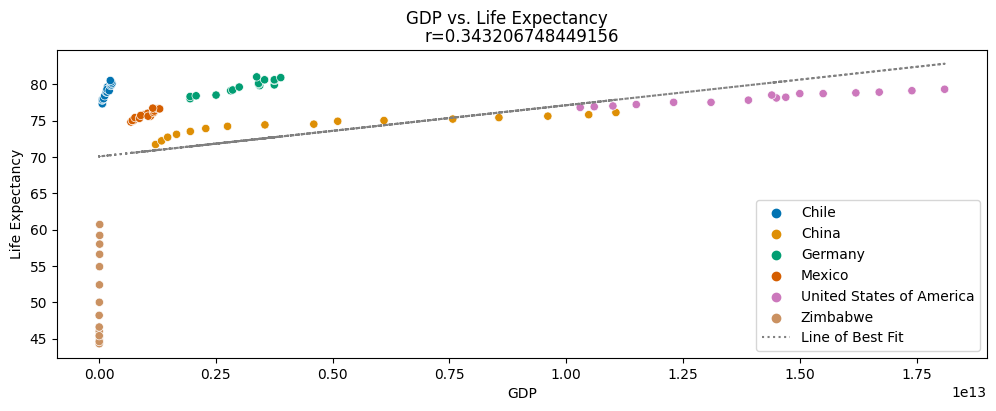

<Figure size 640x480 with 0 Axes>

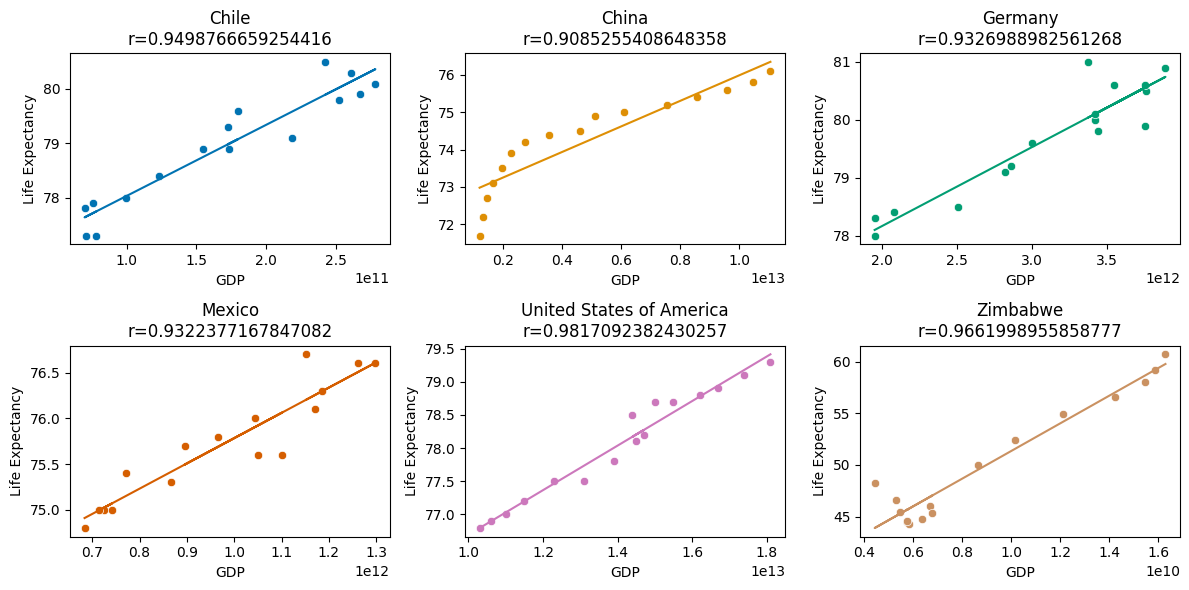

In [34]:
#Create one graph comparing the life expectancy over time for each country.
fig = plt.figure(figsize=(12,4))
fig.suptitle("GDP vs. Life Expectancy")
sns.scatterplot(data=all_data, x='GDP', y='Life expectancy at birth (years)', hue='Country')

#Generate a linear regression model of the relationship between Life expectancy and GDP for all countries in the data set.
model = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ GDP', all_data)
results = model.fit()
fitted = results.predict(all_data['GDP'])

#Superimpose the line of best fit.
plt.plot(all_data.GDP, fitted, color='gray', linestyle=':',label="Line of Best Fit")

#Calculate the strength of the relationship.
cor, pval = stats.pearsonr(all_data['GDP'], all_data['Life expectancy at birth (years)'])
plt.title(f"r={cor}")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()
plt.clf()
fig = plt.figure(figsize=(12,6))

# Create a separate graph for each country to better understand the changes over time at scale for each.
# Loop through each country
# Create a scatter plot of life expectancy vs GDP.
# Calculate a linear regression model and use it to fit expected results.
# Superimpose the line of best fit.
# Calculate the correlation coefficient for the model.
for i in range(6):
    plt.subplot(2,3,i+1)
    country = countries[i]
    country_data=all_data[all_data.Country == country]
    sns.scatterplot(data=country_data,x='GDP', y='Life expectancy at birth (years)', color=palette6[i])
    model = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ GDP', country_data)
    results = model.fit()
    fitted = results.predict(country_data['GDP'])
    plt.plot(country_data.GDP, fitted, color=palette6[i])
    cor, pval = stats.pearsonr(country_data['GDP'], country_data['Life expectancy at birth (years)'])
    plt.title(f"{country}\nr={cor}")
    plt.ylabel("Life Expectancy")

fig.tight_layout()
plt.show()

Some observations to make about the relationship between GDP and Life Expectancy:
- Within every country, there is a strong, positive correlation between GDP and life expectancy.
- Across the world, however, GDP is a weak indicator of life expectancy, with a correlation coeficcient of only 0.34
    - Chile, Mexico, and Germany have significantly lower GDPs than the US.
    - Chile, Mexico, and Germany have life expectancies that are comparable or greater than that of the US.  
- China has the weakest correlation between GDP and L.E., with a correlation coefiicient of approx. 0.91.

## Conclusions
#### What is the distribution and spread of GDP?
+ The mean GDP is approx. 3.9 trillion USD with a standard dev. of 5.2 trillion USD.
+ The median GDP is approx. 1.3 trillion USD.
+ The spread is skewed heavily to the right because of the United States' exceptionally high GDPs and thu upper end of China's GDPs.
+ The first quartile is 173 billion USD.
+ The third quartile is 4.1 trillion USD.
+ The IQR is 3.9 Trillion USD.
#### What is the distribution of and spread Life Expectancy?
+ The mean Life Expectancy is approx. 72.8 years with a standard dev. of 10.7 years
+ The median Life Expectancy is approx. 76.8
+ The spread is skewed heavily to the left because of Zimbabwe's exceptionally low life expectancies.
+ The first quartile is 74.5 years
+ The third quartile is 78.9 years
+ The IQR is 4.4 years
#### Has GDP increased over time in the six nations?
- All of these country's GDPs have trended upward over time.
- The US shows a near-perfect linear relationships, with a corellation coefiicient of 0.99.
- Mexico and Germany appear to have the most year-to-year variability.
- Zimbabwe was the only country to show consistent decline in GDP, up until the year 2009. Since 2009, their GDP has consistently risen.
    - A quick web search indicates that in 2009, __["the government abandoned printing Zimbabwean dollars entirely" and has since "used a combination of foreign currencies, mostly US dollars." ](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjD6tis_6yAAxVHBzQIHfWQDmIQFnoECA4QAw&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FHyperinflation_in_Zimbabwe&usg=AOvVaw2FD06UP-l9TPvUJfgn62zf&opi=89978449)__ 
#### Has life expectancy increased over time in the six nations?
- All of these countries have trended upward over time.
- Mexico and Chile appear to have the most year-to-year variability.
- Like with GDP, Zimbabwe was the only country to show consistent decline in life expectancy. This turned around in 2005.
#### Is there a correlation between GDP and life expectancy of a country?
- Within any specific country, there is a strong, positive correlation between GDP and life expectancy.
  - Higher GDPs are linked to longer life expectancies, and lower GDPs are linked to shorter life expectancies.
  - China has the weakest correlation between GDP and L.E., with a corellation coefiicient of approx. 0.91.
- Worldwide, GDPs is weakly correlated with life expectancy.
    - For example
        - Chile has a GDP two orders of magnitude lower than the US and China.
        - Chile has reported life expectancies comparable to the mid-to-high range of the US.
        - Chile's shortest reported life expectancy is higher than China's longest reported life expectancy.